# **ОБРАБОТКА ДАННЫХ**

In [6]:
# Поиск всех слов для описания погоды
unique_words = []
with open('все_погоды.txt', 'rt', encoding="utf-8") as f:
    for line in f:
        line_word = line.replace("(ая)", "").replace("(ые)", "").replace("(переохлажденный)", "")\
            .replace("(охватывающий часть аэродрома)", "").replace("(ливни)", "")\
            .replace("(а)", "").replace("и/или снежная крупа", "").replace("ледяные иглы", "")\
            .replace("(алмазная пыль)", "алмазная пыль")\
            .replace("воронкообразное облако (торнадо или водяной смерч)", "торнадо")\
            .replace("и/или снежная крупа", "").replace("(метель, буря)", "метель/буря")

        # Уберём прилагательные, описывающие явления
        line_word = line_word.replace("частичный", "").replace("слабый", "").replace("небольшой", "")\
            .replace("клочьями", "").replace("низовая", "").replace("поземный", "")\
            .replace("замерзающий", "").replace("вблизи", "").replace("сильный", "")\
            .replace("частичный", "")
        
        line_word = line_word.replace("  ", " ")
    
        line_word = line_word.split(":")[0]
        words = [w.strip().lower() for w in line_word.split(",")]
        unique_words += words

unique_words = list(set(unique_words))
for w in unique_words:
    print(w)


дым
поземок
мгла
метель/буря песок
ледяная крупа
шквалы
град
торнадо
туман
метель/буря обложная пыль
морось
метель/буря ливень
снежные зерна
метель/буря снег
песок
дождь
ливень
алмазная пыль
обложная пыль
гроза
метель/буря алмазная пыль
метель/буря
пыльная буря
дымка
снег


In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# env_mode = "google"
env_mode = "local"

In [3]:
# df = pd.read_csv("/content/drive/MyDrive/Coursework/meteo_data.csv", sep=";")
# df.head(3)

Проверим распределение дальностей видимости на разных станциях

In [8]:
airports = [ap.replace(".csv", "") for ap in os.listdir('./cities_result/airports')]
meteo_stations = [ms.replace(".csv", "") for ms in os.listdir('./cities_result/weather_stations')]

In [86]:
# airports = ['barnaul_airport', 'abakan_airport', 'anadyr_airport', 'anapa_airport', 'arkhangelsk_airport', 'astrakhan_airport', 'belgorod_airport',
#             'blagoveschensk_airport', 'cheboksary_airport', 'chelyabinsk_airport', 'cherepovets_airport', 'grozny_airport',
#             'irkutsk_airport', 'kaluga_airport', 'kazan_airport', 'khabarovsk_airport', 'khanty_mansiysk_airport', 'kishinev_airport',
#             'koltsovo_airport', 'krasnodar_airport', 'krasnoyarsk_airport', 'kursk_airport', 'kurumoch_airport', 'lipetsk_airport',
#             'magadan_airport', 'moscow_airport', 'murmansk_airport', 'nizhnekamsk_airport', 'nizhniy_novgorod_airport',
#             'novokuznetsk_airport', 'novosibirsk_airport', 'omsk_airport', 'orenburg_airport', 'perm_airport', 'pskov_airport',
#             'pulkovo_airport', 'saransk_airport', 'surgut_airport', 'tyumen_airport', 'ufa_airport', 'ulan_ude_airport',
#             'ulyanovsk_airport', 'vladikavkaz_airport', 'vladivostok_airport', 'volgograd_airport', 'voronezh_airport',
#             'yakutsk_airport', 'yaroslavl_airport', 'yuzhno_sakhalinsk_airport', 'zhukovskiy_airport']

In [9]:
if env_mode == "google":
  files_path = "/content/drive/MyDrive/Coursework/cities_result"
elif env_mode == "local":
  files_path = "./cities_result"
else:
  raise Exception("env_mode should be 'local' or 'google'!")

In [10]:
# Используем данные с аэропортов или метеостанций
use_airfields = True

In [7]:
if use_airfields:
  df = pd.read_csv(f"{files_path}/airports/{airports[0]}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)
  for airport in airports[1:]:
    print(airport, end=": ")
    city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)
    city_df = city_df.dropna(subset=['VV'])
    city_df = city_df[city_df['VV'] != 'nan']
    print(f"{city_df.shape}")
    df = pd.concat([df, city_df]).drop(['Unnamed: 13'], axis=1)
  df = df.rename(columns={"P0": "Po"})

else:
  # Метеостанции
  # cities = ['nauchniy_gorodok', 'anadyr', 'anapa', 'arkhangelsk', 'astrakhan', 'belgorod', 'blagoveschensk', 'bryansk', 'cheboksary',
  #           'cherepovets', 'chernogorsk', 'deme', 'grozny', 'irkutsk', 'istok', 'izhevsk', 'kaluga',
  #           'kazan', 'khabarovsk', 'khanty_mansiysk', 'kishinev', 'krasnodar', 'krasnoyarsk', 'kursk', 'lipetsk', 'mnogoudobniy',
  #           'moscow', 'murmansk', 'novokuznetsk', 'novosibirsk', 'omsk', 'palatka', 'pskov', 'rostov_na_donu', 'samara',
  #           'sankt_peterburg', 'saransk', 'shershni', 'simferopol', 'stavropol', 'surgut', 'tambov', 'tomsk', 'tyumen', 'ulan_ude',
  #           'ulyanovsk', 'vitebsk', 'vladikavkaz', 'volgograd', 'voronezh', 'yakutsk', 'yaroslavl', 'yuzhno_sakhalinsk']
  cities = ['nauchniy_gorodok', 'anadyr', 'anapa', 'arkhangelsk', 'astrakhan', 'sankt_peterburg', 'belgorod', 'blagoveschensk', 'bryansk', 'cheboksary',
            'cherepovets', 'chernogorsk', 'volgograd', 'krasnoyarsk', 'moscow', 'grozny', 'irkutsk', 'istok', 'izhevsk', 'kaluga']
  
  # cities = ['nauchniy_gorodok', 'arkhangelsk', 'astrakhan']

  df = pd.read_csv(f"{files_path}/weather_stations/{cities[0]}.csv", sep=";").astype({"sss": str, "VV": str, "E'": str}).drop(['Unnamed: 29'], axis=1).drop(['Time'], axis=1)
  for city in cities[1:]:
    city_df = pd.read_csv(f"{files_path}/weather_stations/{city}.csv", sep=";", dtype={"sss": str, "VV": str, "tR": str, "E'": str}).drop(['Unnamed: 29'], axis=1).drop(['Time'], axis=1)
    city_df = city_df.dropna(subset=['VV'])
    city_df = city_df[city_df['VV'] != 'nan']
    print(f"{city}: {city_df.shape}")
    print(sorted(city_df['VV'].unique()))
    df = pd.concat([df, city_df])

df = df.dropna(subset=['VV'])
df = df[df['VV'] != 'nan']
df = df.reset_index(drop=True)
print(f"================\n{df.shape}")
df.head()

aktau_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(181843, 13)
aktobe_airport: (181855, 13)
almaty_airport: (183063, 13)
anadyr_airport: (119752, 13)
anapa_airport: (171526, 13)
arkhangelsk_airport: (153819, 13)
astrakhan_airport: (179355, 13)
atyrau_airport: (181581, 13)
balhash_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(70577, 13)
barnaul_airport: (178155, 13)
belgorod_airport: (174171, 13)
blagoveschensk_airport: (151330, 13)
brest_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(67793, 13)
bygdosch_airport: (145668, 13)
cheboksary_airport: (175327, 13)
chelyabinsk_airport: (177998, 13)
cherepovets_airport: (127462, 13)
fergan_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(120726, 13)
gomel_airport: (153134, 13)
grodno_airport: (69103, 13)
grozny_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(126791, 13)
hudzhand_airport: (180867, 13)
irkutsk_airport: (125347, 13)
kaluga_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(123780, 13)
karaganda_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(183441, 13)
karshi_airport: (160722, 13)
katovitse_airport: (182362, 13)
kazan_airport: (177503, 13)
kekshetau_airport: (85999, 13)
khabarovsk_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(179928, 13)
khanty_mansiysk_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(176625, 13)
kishinev_airport: (191666, 13)
koltsovo_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(179946, 13)
kostanai_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(175941, 13)
krakov_airport: (182927, 13)
krasnodar_airport: (179394, 13)
krasnoyarsk_airport: (179836, 13)
kursk_airport: (121070, 13)
kurumoch_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(176040, 13)
kyzylorda_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(157611, 13)
lipetsk_airport: (91301, 13)
lodz_airport: (181598, 13)
lublin_airport: (144545, 13)
magadan_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(140979, 13)
minks_airport: (238900, 13)
mogilyov_airport: (50302, 13)
moscow_airport: (180245, 13)
murmansk_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(167049, 13)
namangan_airport: (149677, 13)
navoi_airport: (159059, 13)
nizhnekamsk_airport: (178050, 13)
nizhniy_novgorod_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(178553, 13)
novokuznetsk_airport: (51726, 13)
novosibirsk_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(179993, 13)
nukus_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(166965, 13)
nur_sultan_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(183510, 13)
omsk_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(178125, 13)
orenburg_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(151970, 13)
pavlodar_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(178215, 13)
perm_airport: (177231, 13)
poznan_airport: (183642, 13)
pskov_airport: (117718, 13)
pulkovo_airport: (180216, 13)
samarkand_airport: (165203, 13)
saransk_airport: (45676, 13)
schetsin_airport: (180862, 13)
schitno_shimanah_airport: (112208, 13)
semei_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(91300, 13)
shymkent_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(180269, 13)
surgut_airport: (178032, 13)
tashkent_airport: (167166, 13)
termez_airport: (165980, 13)
tyumen_airport: (178051, 13)
ufa_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(176021, 13)
ulan_ude_airport: (178407, 13)
ulyanovsk_airport: (51733, 13)
uralsk_airport: (168762, 13)
urgench_airport: (160756, 13)
ust_kamenogorsk_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(159272, 13)
varshava_airport: (183607, 13)
vitebsk_airport: (64942, 13)
vladikavkaz_airport: (119551, 13)
vladivostok_airport: (180104, 13)
volgograd_airport: (177617, 13)
voronezh_airport: (166622, 13)
vrotslav_airport: (183364, 13)
yakutsk_airport: (175803, 13)
yaroslavl_airport: (157345, 13)
yuzhno_sakhalinsk_airport: (154839, 13)
zelyona_gura_airport: (107495, 13)
zhekazgan_airport: 

C:\Users\db\AppData\Local\Temp\ipykernel_20472\1332964954.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv(f"{files_path}/airports/{airport}.csv", sep=";", dtype={"VV": str, "c": str}).drop(['Time'], axis=1)


(69654, 13)
zheshuv_airport: (183410, 13)
zhukovskiy_airport: (167443, 13)
(14450290, 12)


,T,Po,P,U,DD,Ff,ff10,WW,W'W',c,VV,Td
0,7.0,740.1,762.8,27.0,"Ветер, дующий с юго-юго-запада",2.0,NaN,NaN,NaN,Нет существенной облачности,10.0 и более,-11.0
1,7.0,740.1,762.8,27.0,"Ветер, дующий с юго-юго-запада",1.0,NaN,NaN,NaN,Нет существенной облачности,10.0 и более,-11.0
2,9.0,740.2,762.8,25.0,"Ветер, дующий с юго-запада",3.0,NaN,NaN,NaN,Нет существенной облачности,10.0 и более,-10.0
3,9.0,740.2,762.8,23.0,"Ветер, дующий с западо-юго-запада",4.0,NaN,NaN,NaN,Нет существенной облачности,10.0 и более,-11.0
4,9.0,740.2,762.8,21.0,"Ветер, дующий с западо-юго-запада",4.0,NaN,NaN,NaN,Нет существенной облачности,10.0 и более,-12.0


In [8]:
# backup df
# df_backup = df.copy()

In [8]:
# df = df_backup.copy()

In [8]:
for vv in df['VV'].unique():
    try:
        float(vv)
    except:
        print(vv)

10.0 и более


{'10.0 и более': 11075721, '5.0': 427613, '6.0': 375310, '7.0': 367722, '9.0': 367452, '8.0': 342468, '4.0': 103247, '3.0': 81968, '2.5': 49243, '0.2': 46124, '4.5': 44973, '3.5': 42667, '2.0': 42509, '2.1': 38636, '0.3': 37905, '3.2': 33648, '0.1': 32141, '1.5': 31448, '0.8': 30558, '1.8': 30125, '2.2': 29629, '0.4': 28936, '1.2': 27380, '2.8': 27262, '0.5': 26223, '2.4': 26208, '3.1': 26191, '4.2': 25977, '1.6': 25786, '2.3': 25755, '2.7': 24743, '2.6': 24659, '3.8': 24651, '1.1': 24280, '3.3': 24265, '4.4': 24169, '4.1': 23985, '1.0': 23893, '4.3': 23857, '1.4': 23742, '4.8': 23440, '3.6': 23390, '0.6': 23306, '2.9': 23214, '1.7': 23047, '4.9': 22946, '0.9': 22720, '1.3': 22338, '3.4': 22128, '1.9': 22013, '3.7': 21888, '4.6': 21532, '3.9': 21397, '0.7': 21132, '4.7': 20906, '0.0': 1762, '10.0': 14, '5.5': 7, '9.6': 6, '5.7': 4, '5.6': 4, '5.1': 3, '5.3': 3, '5.8': 2, '5.2': 2, '6.6': 2, '6.5': 2, '5.4': 2, '6.8': 2, '5.9': 2, '9.9': 2, '8.2': 1, '6.4': 1, '9.1': 1, '6.7': 1, '8.9':

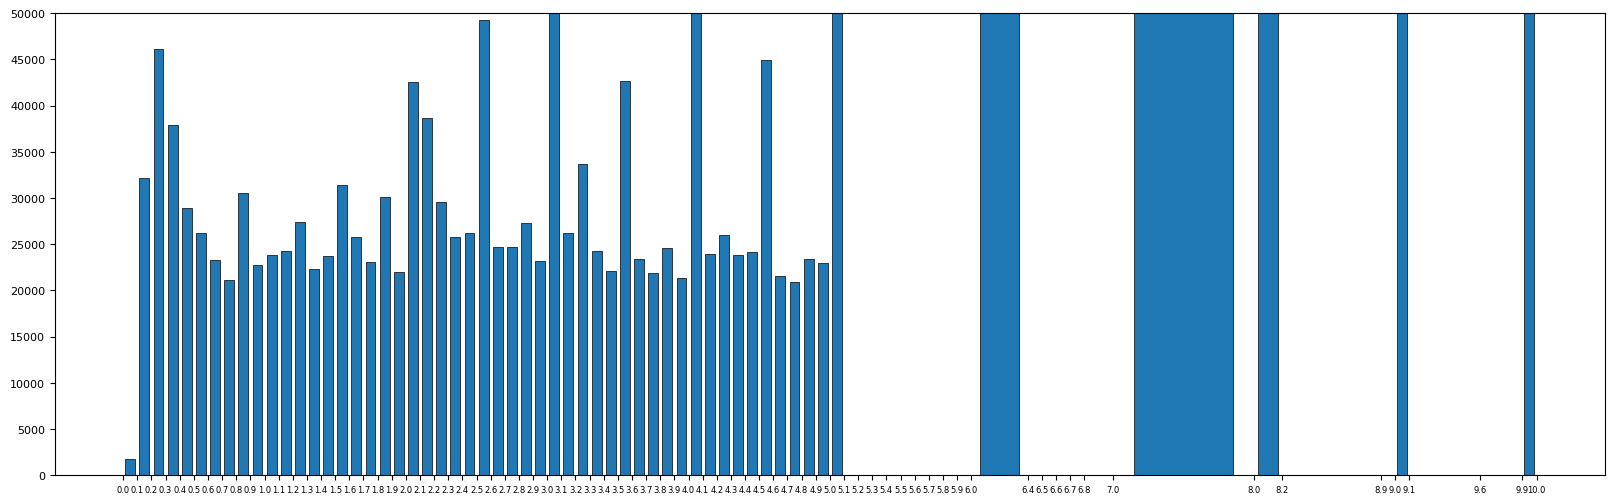

In [9]:
# Выведем распределние дальностей видимости

print(dict(df['VV'].value_counts(ascending=False)))

if use_airfields:
    df_tmp = df.copy()
    df_tmp.loc[(df_tmp['VV'] == '10.0 и более'), 'VV'] = '10.0'
    df_tmp = df_tmp.astype({'VV': float})

    bins = sorted(df_tmp['VV'].unique())

    plt.figure(figsize=(20,6))
    plt.hist(df_tmp['VV'], bins=bins, edgecolor='black', linewidth=0.5, rwidth=0.7)
    plt.xticks(bins, fontsize=6)
    plt.yticks(ticks=[t for t in range(0, 250000, 5000)], fontsize=8)
    plt.ylim([0, 50000])
    plt.show()

else:
    df_tmp = df.copy()
    df_tmp.loc[(df_tmp['VV'] == 'менее 0.1'), 'VV'] = '0.1'
    df_tmp.loc[(df_tmp['VV'] == 'менее 0.05'), 'VV'] = '0.1'
    df_tmp.loc[(df_tmp['VV'] == '0.05'), 'VV'] = '0.1'
    df_tmp.loc[(df_tmp['VV'] == 0.05), 'VV'] = '0.1'

    df_tmp = df_tmp.astype({'VV': float})

    # tmp:
    df_tmp.loc[(df_tmp['VV'] <= 1.0), 'VV'] = 1.0
    df_tmp.loc[( (df_tmp['VV'] >= 1.8) & (df_tmp['VV'] <= 2.2) ), 'VV'] = 2.0

    df_tmp = df_tmp[df_tmp['VV'] <= 17.0]
    df_tmp = df_tmp[df_tmp['VV'] != 8.0]
    df_tmp = df_tmp[df_tmp['VV'] != 9.0]
    df_tmp = df_tmp[df_tmp['VV'] != 0.1]
    df_tmp = df_tmp[df_tmp['VV'] != 0.0]


    bins = sorted(df_tmp['VV'].unique())
    print(bins)

    plt.figure(figsize=(20,6))
    plt.hist(df_tmp['VV'], bins=bins, edgecolor='black', linewidth=0.5, rwidth=0.7)
    plt.xticks(bins, fontsize=6)
    plt.yticks(ticks=[t for t in range(0, 250000, 2000)], fontsize=8)
    plt.ylim([0, 50000])
    plt.show()

del df_tmp

In [10]:
if use_airfields:
    # Удалим строки со значениями VV больше 5, имеющими дробную часть, '0.0' и '10.0', т.к. эти значения встречаются слишком редко
    vv_to_exclude = ['0.0', '10.0']
    for i in range (5, 10):
        for j in range (1, 10):
            vv_to_exclude.append(f"{i}.{j}")

    df = df[~df['VV'].isin(vv_to_exclude)]
    print(dict(df['VV'].value_counts(ascending=False)))

{'10.0 и более': 11075721, '5.0': 427613, '6.0': 375310, '7.0': 367722, '9.0': 367452, '8.0': 342468, '4.0': 103247, '3.0': 81968, '2.5': 49243, '0.2': 46124, '4.5': 44973, '3.5': 42667, '2.0': 42509, '2.1': 38636, '0.3': 37905, '3.2': 33648, '0.1': 32141, '1.5': 31448, '0.8': 30558, '1.8': 30125, '2.2': 29629, '0.4': 28936, '1.2': 27380, '2.8': 27262, '0.5': 26223, '2.4': 26208, '3.1': 26191, '4.2': 25977, '1.6': 25786, '2.3': 25755, '2.7': 24743, '2.6': 24659, '3.8': 24651, '1.1': 24280, '3.3': 24265, '4.4': 24169, '4.1': 23985, '1.0': 23893, '4.3': 23857, '1.4': 23742, '4.8': 23440, '3.6': 23390, '0.6': 23306, '2.9': 23214, '1.7': 23047, '4.9': 22946, '0.9': 22720, '1.3': 22338, '3.4': 22128, '1.9': 22013, '3.7': 21888, '4.6': 21532, '3.9': 21397, '0.7': 21132, '4.7': 20906}


In [11]:
for column in df.columns:
  print(f"'{column}' is not nan:  {df.dropna(subset=[column]).shape[0]}")

'T' is not nan:  14446400
'Po' is not nan:  14445149
'P' is not nan:  14446692
'U' is not nan:  14445625
'DD' is not nan:  14446103
'Ff' is not nan:  14446103
'ff10' is not nan:  713366
'WW' is not nan:  3181246
'W'W'' is not nan:  62382
'c' is not nan:  14378090
'VV' is not nan:  14448466
'Td' is not nan:  14445625


ДОБАВЛЕНИЕ ДАННЫХ

In [12]:
# Убираем записи с пустым полем "Дальность видимости"
df[df['VV'].isnull()].shape
df = df[~df['VV'].isnull()]
print(df.shape)
df.head(0)

(14448466, 12)


,T,Po,P,U,DD,Ff,ff10,WW,W'W',c,VV,Td


Убираем лишние поля из таблицы, оставляя лишь несколько

In [13]:
if use_airfields:
    # Аэоропорты
    df = df[['T', 'P', 'Po', 'U', 'DD', 'Ff', 'WW', 'c', 'VV', 'Td']] # drop ff10 and W'W'

else:
    # Метеостанции
    df = df[['T', 'P', 'Po', 'U', 'DD', 'Ff', 'N', 'WW', 'VV', 'Td', 'P']]

df.head(5)

,T,P,Po,U,DD,Ff,WW,c,VV,Td
0,7.0,762.8,740.1,27.0,"Ветер, дующий с юго-юго-запада",2.0,NaN,Нет существенной облачности,10.0 и более,-11.0
1,7.0,762.8,740.1,27.0,"Ветер, дующий с юго-юго-запада",1.0,NaN,Нет существенной облачности,10.0 и более,-11.0
2,9.0,762.8,740.2,25.0,"Ветер, дующий с юго-запада",3.0,NaN,Нет существенной облачности,10.0 и более,-10.0
3,9.0,762.8,740.2,23.0,"Ветер, дующий с западо-юго-запада",4.0,NaN,Нет существенной облачности,10.0 и более,-11.0
4,9.0,762.8,740.2,21.0,"Ветер, дующий с западо-юго-запада",4.0,NaN,Нет существенной облачности,10.0 и более,-12.0


In [14]:
# НАПРАВЛЕНИЕ ВЕТРА
df = df[df['DD'] != 'Переменное направление']

wind_directions = {"с севера": 360, "с северо-северо-востока": 22.5, "с северо-востока": 45, "с востоко-северо-востока": 67.5,
 "с востока": 90, "с востоко-юго-востока": 112.5, "с юго-востока": 135, "с юго-юго-востока": 157.5,
 "с юга": 180, "с юго-юго-запада": 202.5, "с юго-запада": 225, "с западо-юго-запада": 247.5,
 "с запада": 270, "с западо-северо-запада": 292.5, "с северо-запада": 315, "с северо-северо-запада": 337.5,
 "Штиль": 0}

for wind_dir_str, wind_dir_num in wind_directions.items():
  df.loc[df['DD'].str.contains(wind_dir_str, na=False), 'DD'] = float(wind_dir_num)
df['DD'] = df['DD'].astype(float)

for i in sorted(list(df['DD'].unique())):
  if pd.isnull(i):
    continue
  print(f"{i}: {df[df['DD'] == i].shape[0]}")
print(f"Тип данных: {np.dtype(df['DD'])}")

0.0: 674103
22.5: 562922
45.0: 566489
67.5: 679333
90.0: 1042865
112.5: 665461
135.0: 691606
157.5: 676925
180.0: 1024645
202.5: 805758
225.0: 947774
247.5: 1008115
270.0: 1318192
292.5: 781321
315.0: 698205
337.5: 640027
360.0: 894152
Тип данных: float64


In [15]:
# ТЕМПЕРАТУРА
field = 'T'
print("NaN: ", df[df[field].isnull()].shape[0])
print(f"Тип данных: {np.dtype(df[field])}")

NaN:  1955
Тип данных: float64


In [16]:
# АТМ. ДАВЛЕНИЕ НА УРОВНЕ СТАНЦИИ
field = 'Po'
print("NaN: ", df[df[field].isnull()].shape[0])
print(f"Тип данных: {np.dtype(df[field])}")

NaN:  3153
Тип данных: float64


In [17]:
# АТМ. ДАВЛЕНИЕ НА УРОВНЕ МОРЯ
field = 'P'
print("NaN: ", df[df[field].isnull()].shape[0])
print(f"Тип данных: {np.dtype(df[field])}")

NaN:  1689
Тип данных: float64


In [18]:
# ОТН. ВЛАЖНОСТЬ НА ВЫСОТЕ 2 М
field = 'U'
print("NaN: ", df[df[field].isnull()].shape[0])
print(f"Тип данных: {np.dtype(df[field])}")

NaN:  2693
Тип данных: float64


In [19]:
# СКОРОСТЬ ВЕТРА НА ВЫС. 10-12 М за 10 минут
field = 'Ff'
unique_values = sorted(list(df[field].unique()))
for i in unique_values:
  if pd.isnull(i):
    continue
  print(f"{i}: {df[df[field] == i].shape[0]}")
print("NaN: ", df[df[field].isnull()].shape[0])
print(f"Тип данных: {np.dtype(df[field])}")

0.0: 674103
1.0: 817716
2.0: 2535681
3.0: 2710280
4.0: 2242272
5.0: 1701594
6.0: 1176191
7.0: 767109
8.0: 460663
9.0: 270541
10.0: 153351
11.0: 77915
12.0: 42030
13.0: 22182
14.0: 11483
15.0: 6850
16.0: 3318
17.0: 1813
18.0: 1051
19.0: 622
20.0: 408
21.0: 241
22.0: 140
23.0: 113
24.0: 52
25.0: 55
26.0: 41
27.0: 20
28.0: 15
29.0: 16
30.0: 11
31.0: 4
32.0: 3
33.0: 2
34.0: 2
35.0: 4
38.0: 1
NaN:  2363
Тип данных: float64


In [20]:
if not use_airfields:
  # Заменяем значения в поле 'N' на числовые
  # При этом значение "Небо не видно из-за тумана..." заменим на 100

  print(df['N'].unique())

  # Убираем записи с NaN в поле 'N'
  df.dropna(subset=['N'], inplace=True)

  df.loc[df['N'].str.contains("Облаков нет", na=False), 'N'] = 0.0
  df.loc[df['N'] == 4, 'N'] = 5.0
  df.loc[df['N'].str.contains("10%  или менее, но не 0", na=False), 'N'] = 5.0
  df.loc[df['N'].str.contains("20–30%", na=False), 'N'] = 25.0
  df.loc[df['N'].str.contains("40%", na=False), 'N'] = 40.0
  df.loc[df['N'].str.contains("50%", na=False), 'N'] = 50.0
  df.loc[df['N'].str.contains("60%", na=False), 'N'] = 60.0
  df.loc[df['N'].str.contains("70 – 80%", na=False), 'N'] = 75.0
  df.loc[df['N'].str.contains("90  или более, но не 100%", na=False), 'N'] = 95.0
  df.loc[df['N'].str.contains("100%", na=False), 'N'] = 100.0
  df.loc[df['N'].str.contains("Небо не видно из-за тумана и/или других метеорологических явлений.", na=False), 'N'] = 100.0
  df['N'] = df['N'].astype(float)

  # Выводим результат
  field = 'N'
  unique_values = df[field].unique()
  for i in unique_values:
    print(f"{i}: {df[df[field] == i].shape[0]}")
  print(f"Тип данных: {np.dtype(df[field])}")

In [21]:
df.head(10)

,T,P,Po,U,DD,Ff,WW,c,VV,Td
0,7.0,762.8,740.1,27.0,202.5,2.0,NaN,Нет существенной облачности,10.0 и более,-11.0
1,7.0,762.8,740.1,27.0,202.5,1.0,NaN,Нет существенной облачности,10.0 и более,-11.0
2,9.0,762.8,740.2,25.0,225.0,3.0,NaN,Нет существенной облачности,10.0 и более,-10.0
3,9.0,762.8,740.2,23.0,247.5,4.0,NaN,Нет существенной облачности,10.0 и более,-11.0
4,9.0,762.8,740.2,21.0,247.5,4.0,NaN,Нет существенной облачности,10.0 и более,-12.0
5,9.0,762.8,740.2,23.0,202.5,4.0,NaN,Нет существенной облачности,10.0 и более,-11.0
6,9.0,762.8,740.2,23.0,225.0,4.0,NaN,Нет существенной облачности,10.0 и более,-11.0
7,8.0,762.8,740.2,25.0,202.5,4.0,NaN,Нет существенной облачности,10.0 и более,-11.0
8,8.0,762.8,740.2,25.0,202.5,4.0,NaN,Нет существенной облачности,10.0 и более,-11.0
9,7.0,762.8,740.1,27.0,202.5,5.0,NaN,Нет существенной облачности,10.0 и более,-11.0


ДАЛЬНОСТЬ ВИДИМОСТИ (VV)

In [22]:
if use_airfields:
  df['VV'] = df['VV'].astype(str)
  df.loc[(df['VV'] == '10.0 и более'), 'VV'] = 10
  df['VV'] = df['VV'].astype(float)

else:
  df['VV'] = df['VV'].astype(str)
  df.loc[(df['VV'] == '10.0 и более'), 'VV'] = 10
  df.loc[(df['VV'] == 'менее 0.05'), 'VV'] = 0.05
  df.loc[(df['VV'] == 'менее 0.1'), 'VV'] = 0.1
  df['VV'] = df['VV'].astype(float)


visibility_ranges = sorted(list(df['VV'].unique()))
print("Кол-во зафиксированных дальностей видимости:")
for v in visibility_ranges:
  print(f"{v}: {df[df['VV'] == v].shape[0]}")
print("NaN: ", df[df['VV'].isnull()].shape[0])
print(f"Тип данных: {np.dtype(df['VV'])}")

df.head(10)

Кол-во зафиксированных дальностей видимости:
0.1: 26219
0.2: 40152
0.3: 33909
0.4: 26117
0.5: 23797
0.6: 21172
0.7: 19493
0.8: 28122
0.9: 21151
1.0: 21795
1.1: 22493
1.2: 25339
1.3: 20751
1.4: 22145
1.5: 29045
1.6: 23925
1.7: 21522
1.8: 28040
1.9: 20672
2.0: 39047
2.1: 36080
2.2: 27528
2.3: 24062
2.4: 24596
2.5: 45156
2.6: 23084
2.7: 23177
2.8: 25553
2.9: 21810
3.0: 74749
3.1: 24639
3.2: 31746
3.3: 22750
3.4: 20697
3.5: 39418
3.6: 21937
3.7: 20539
3.8: 23125
3.9: 20106
4.0: 94411
4.1: 22745
4.2: 24540
4.3: 22483
4.4: 22775
4.5: 42186
4.6: 20354
4.7: 19720
4.8: 22143
4.9: 21860
5.0: 398475
6.0: 352644
7.0: 346093
8.0: 322317
9.0: 346506
10.0: 10535346
NaN:  0
Тип данных: float64


,T,P,Po,U,DD,Ff,WW,c,VV,Td
0,7.0,762.8,740.1,27.0,202.5,2.0,NaN,Нет существенной облачности,10.0,-11.0
1,7.0,762.8,740.1,27.0,202.5,1.0,NaN,Нет существенной облачности,10.0,-11.0
2,9.0,762.8,740.2,25.0,225.0,3.0,NaN,Нет существенной облачности,10.0,-10.0
3,9.0,762.8,740.2,23.0,247.5,4.0,NaN,Нет существенной облачности,10.0,-11.0
4,9.0,762.8,740.2,21.0,247.5,4.0,NaN,Нет существенной облачности,10.0,-12.0
5,9.0,762.8,740.2,23.0,202.5,4.0,NaN,Нет существенной облачности,10.0,-11.0
6,9.0,762.8,740.2,23.0,225.0,4.0,NaN,Нет существенной облачности,10.0,-11.0
7,8.0,762.8,740.2,25.0,202.5,4.0,NaN,Нет существенной облачности,10.0,-11.0
8,8.0,762.8,740.2,25.0,202.5,4.0,NaN,Нет существенной облачности,10.0,-11.0
9,7.0,762.8,740.1,27.0,202.5,5.0,NaN,Нет существенной облачности,10.0,-11.0


In [23]:
# Для метеостанций: урежем до 4 классов: 1, 2, 4 и 10
if not use_airfields:
    df.loc[(df['VV'] > 0 ) & (df['VV'] < 1.4 ), 'VV'] = 1.0
    df.loc[(df['VV'] >= 1.6 ) & (df['VV'] < 2.8 ), 'VV'] = 2.0
    df.loc[(df['VV'] >= 3.2 ) & (df['VV'] < 5.0 ), 'VV'] = 4.0
    df.loc[(df['VV'] >= 9.0 ), 'VV'] = 10.0

    df = df[df['VV'].isin([1.0, 2.0, 4.0, 10.0])]

    visibility_ranges = sorted(list(df['VV'].unique()))
    print("Кол-во зафиксированных дальностей видимости:")
    for v in visibility_ranges:
        print(f"{v}: {df[df['VV'] == v].shape[0]}")

In [24]:
# ТЕМПЕРАТУРА ТОЧКИ РОСЫ НА ВЫСОТЕ 2 М
field = 'Td'
unique_values = sorted( list(df[field].unique()) )
for i in unique_values:
  if pd.isnull(i):
    continue
  print(f"{i}: {df[df[field] == i].shape[0]}")
print("NaN: ", df[df[field].isnull()].shape[0])
print(f"Тип данных: {np.dtype(df[field])}")

-86.0: 1
-80.0: 1
-60.0: 6
-59.0: 27
-58.0: 78
-57.0: 104
-56.0: 175
-55.0: 344
-54.0: 561
-53.0: 777
-52.0: 1150
-51.0: 1376
-50.0: 1637
-49.0: 1954
-48.0: 1941
-47.0: 2275
-46.0: 2732
-45.0: 3059
-44.0: 3335
-43.0: 3791
-42.0: 4253
-41.0: 5069
-40.0: 6187
-39.0: 7280
-38.0: 8328
-37.0: 9509
-36.0: 11005
-35.0: 12838
-34.0: 15091
-33.0: 17441
-32.0: 20446
-31.0: 24365
-30.0: 28277
-29.0: 31558
-28.0: 36897
-27.0: 41057
-26.0: 45391
-25.0: 51123
-24.0: 56412
-23.0: 63712
-22.0: 69915
-21.0: 76644
-20.0: 84878
-19.0: 91516
-18.0: 99941
-17.0: 107575
-16.0: 118048
-15.0: 129771
-14.0: 141743
-13.0: 153018
-12.0: 168948
-11.0: 187835
-10.0: 209102
-9.0: 232982
-8.0: 264252
-7.0: 300959
-6.0: 339532
-5.0: 379398
-4.0: 419558
-3.0: 466779
-2.0: 510959
-1.0: 559466
0.0: 633660
1.0: 567432
2.0: 516804
3.0: 498515
4.0: 493502
5.0: 497075
6.0: 503297
7.0: 495732
8.0: 488719
9.0: 475005
10.0: 456735
11.0: 431466
12.0: 395522
13.0: 361989
14.0: 312040
15.0: 264144
16.0: 216583
17.0: 166583
18.0: 

In [25]:
# if use_airfields:
#   # ОБЛАЧНОСТЬ
#   field = 'c'
#   unique_values = df[field].unique()
#   for i in unique_values:
#     if pd.isnull(i):
#       continue
#     print(f"{i}: {df[df[field] == str(i)].shape[0]}")
#   print("NaN: ", df[df[field].isnull()].shape[0])
#   print(f"Тип данных: {np.dtype(df[field])}")

#### Сохраняем полученный датасет в файл meteo_data.csv

In [26]:
if use_airfields:
    df.to_csv('meteo_data.csv', sep=';', encoding='utf-8')

#### Загружаем датасет из meteo_data.csv

In [25]:
use_airfields = True

In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

if use_airfields:
    # env_mode = "google"
    env_mode = "local"

    # Загрузим датасет из файла
    df = pd.read_csv(f"meteo_data.csv", sep=";").drop(['Unnamed: 0'], axis=1)

    # Временно берём треть выборки
    # df = df.sample(frac=0.33).reset_index(drop=True)

In [3]:
df = df.sample(frac=1).reset_index(drop=True) # перетасовываем
df['WW'] = df['WW'].str.lower()

if use_airfields:
    df.fillna({'WW': 'ясно'}, inplace=True)
    
print(f"Shape: {df.shape}")
df.head(20)

Shape: (13680256, 10)


,T,P,Po,U,DD,Ff,WW,c,VV,Td
0,7.0,753.1,732.1,66.0,180.0,9.0,ясно,Разорванная (60-90%) 1200 м,10.0,1.0
1,9.0,757.7,740.4,82.0,270.0,8.0,ясно,"Сплошная (100%) 420 м, кучево-дождевые облака",10.0,6.0
2,0.0,771.1,761.7,80.0,337.5,8.0,"поземок, снег","Рассеянная (40-50%) 480 м, кучево-дождевые обл...",10.0,-3.0
3,1.0,773.4,766.2,48.0,360.0,3.0,ясно,Нет существенной облачности,10.0,-9.0
4,-4.0,762.0,742.5,74.0,202.5,2.0,ясно,Рассеянная (40-50%) 1290 м,10.0,-8.0
5,6.0,750.8,745.6,49.0,315.0,7.0,ясно,"Рассеянная (40-50%) 1200 м, кучево-дождевые об...",10.0,-4.0
6,16.0,753.1,749.4,83.0,157.5,3.0,ясно,Нет существенной облачности,10.0,13.0
7,17.0,759.0,746.2,88.0,270.0,3.0,ясно,Нет существенной облачности,9.0,15.0
8,16.0,762.8,759.0,72.0,45.0,3.0,ясно,Нет существенной облачности,10.0,11.0
9,9.0,753.1,748.8,54.0,292.5,4.0,ясно,Нет существенной облачности,10.0,0.0


In [4]:
df.fillna({'WW': 'ясно'}, inplace=True)
df['WW'] = df['WW'].str.lower()

if use_airfields:
    # --- для аэропортов ---
    df['WW'] = df['WW'].str.replace("(а)", "")
    df['WW'] = df['WW'].str.replace("(ая)", "")
    df['WW'] = df['WW'].str.replace("(ые)", "")
    df['WW'] = df['WW'].str.replace("(ливни)", "")
    df['WW'] = df['WW'].str.replace("(переохлажденный)", "")
    df['WW'] = df['WW'].str.replace("и/или снежная крупа", "")
    df['WW'] = df['WW'].str.lower().replace("ледяные иглы", "")
    df['WW'] = df['WW'].str.replace("(алмазная пыль)", "алмазная пыль")
    df['WW'] = df['WW'].str.lower().replace("воронкообразное облако (торнадо или водяной смерч)", "торнадо")
    df['WW'] = df['WW'].str.replace("и/или снежная крупа", "")
    df['WW'] = df['WW'].str.replace("(метель, буря)", "метель/буря")
    df['WW'] = df['WW'].str.replace("песчаная буря", "пыльная буря")
    df['WW'] = df['WW'].str.replace("(охватывающий часть аэродрома)", "")

    # выкинем записи с "неизвестные осадки"
    df = df[df["WW"].str.contains("неизвестные осадки") == False]
    # ----------------------

else:
    # Для метеостанций
    df['WW'] = df['WW'].str.replace(r'(диаметр.*$)', '')
    df['WW'] = df['WW'].str.replace(r'(неливневы(й|е))', '')  # убираем слова "неливневый(е)"
    df['WW'] = df['WW'].str.replace(r'(без града)', '')  # убираем слова "без града"


# Ещё раз выводим все возможноые значения столбца 'WW'
field = 'WW'
unique_values = df[field].unique()
for i in unique_values:
  if pd.isnull(i):
    continue
  print(f"{i}: {df[df[field] == i].shape[0]}")
print("NaN: ", df[df[field].isnull()].shape[0])
print(f"Тип данных: {np.dtype(df[field])}")

df.head(10)

ясно: 10679907
поземок, снег: 74938
слабый дождь: 197016
слабый ливень , снег: 215355
слабый ливень , снег, дождь, дымка: 2954
снег,низовая метель/буря снег: 17052
клочьями туман, дымка: 7553
поземный туман: 24776
слабый ливень , дождь: 341750
дымка: 614671
слабый снег: 402362
слабый дождь, дымка: 51610
слабый замерзающий  дождь: 6020
мгла: 20910
слабый снег,низовая метель/буря снег: 26150
слабый ливень , снег, дымка: 15715
дым: 78983
туман: 114869
слабый дождь, туман: 2287
слабый ливень , дождь, дымка: 37104
слабый морось: 21037
слабый ливень , снег,низовая метель/буря снег: 18648
дымка, дым: 50200
слабый дождь, снег, дымка: 3077
ливень , снег: 31637
слабый ливень , снег, поземок, снег: 15015
снег: 31392
сильный ливень , снег,низовая метель/буря снег: 6260
сильный снег, дождь, дымка: 34
ливень , снег, дождь: 3422
слабый ливень , снег, дождь: 20746
слабый снег, дымка: 71005
замерзающий  туман: 70715
низовая метель/буря снег: 17994
ливень , дождь: 4527
сильный гроза, дождь: 573
слабый л

,T,P,Po,U,DD,Ff,WW,c,VV,Td
0,7.0,753.1,732.1,66.0,180.0,9.0,ясно,Разорванная (60-90%) 1200 м,10.0,1.0
1,9.0,757.7,740.4,82.0,270.0,8.0,ясно,"Сплошная (100%) 420 м, кучево-дождевые облака",10.0,6.0
2,0.0,771.1,761.7,80.0,337.5,8.0,"поземок, снег","Рассеянная (40-50%) 480 м, кучево-дождевые обл...",10.0,-3.0
3,1.0,773.4,766.2,48.0,360.0,3.0,ясно,Нет существенной облачности,10.0,-9.0
4,-4.0,762.0,742.5,74.0,202.5,2.0,ясно,Рассеянная (40-50%) 1290 м,10.0,-8.0
5,6.0,750.8,745.6,49.0,315.0,7.0,ясно,"Рассеянная (40-50%) 1200 м, кучево-дождевые об...",10.0,-4.0
6,16.0,753.1,749.4,83.0,157.5,3.0,ясно,Нет существенной облачности,10.0,13.0
7,17.0,759.0,746.2,88.0,270.0,3.0,ясно,Нет существенной облачности,9.0,15.0
8,16.0,762.8,759.0,72.0,45.0,3.0,ясно,Нет существенной облачности,10.0,11.0
9,9.0,753.1,748.8,54.0,292.5,4.0,ясно,Нет существенной облачности,10.0,0.0


In [5]:
# Добавляем новые столбцы и заполняем их нулями 

if use_airfields:
  # туман, дым, дымка, мгла, обложная пыль, песок, пыльная буря, метель/буря, поземок, торнадо, шквалы,
  # снежные зёрна, ледяная крупа, алмазная пыль, снег, град, дождь, ливень, морось, гроза
  # частичный, слабый, небольшая, клочьями, низовая, поземный, замерзающий, сильный, вблизи
  new_columns = ['clear', 'fog', 'smoke', 'haze', 'mist', 'cover_dust', 'sand', 'dust_storm', 'blizzard_storm', 'drifting_snow', 'tornado', 
                'squall', 'snow_grains', 'ice_grains', 'diamond_dust', 'snow', 'hail', 'rain', 'shower', 'drizzle', 'thunderstorm',
                'partial', 'weak', 'small', 'shreds', 'lower', 'ground', 'freezing', 'strong', 'near']

else:
  # Туман, Дымка/дым,	Дождь, Снег, Ливень, Слабый, Умеренный,
  # Сильный, Непререрывный, Снежная/ледяная крупа, Град,	Гроза, Молния без грома,
  # Поземок, Буря,	Облака рассеиваются, Облака образовывались,	Алмазная пыль, Мгла,
  # Метель,	Морось,	Сежные. кристаллы, Снежные зёрна
  new_columns = ["fog", "smoke", "rain", "snow", 'shower', 'weak', 'medium',
                 'heavy', 'continuous', "snow_groats", 'hail', 'thunder', 'silent_lightning',
                 'drifting_snow', 'storm', 'disappear_clouds', 'appear_clouds', 'diamond_dust', 'mist',
                 'snowstorm', 'drizzle', 'snow_crystals', 'snow_grains']

for column_name in new_columns:
  df[column_name] = 0

df.head(10)

,T,P,Po,U,DD,Ff,WW,c,VV,Td,clear,fog,smoke,haze,mist,cover_dust,sand,dust_storm,blizzard_storm,drifting_snow,tornado,squall,snow_grains,ice_grains,diamond_dust,snow,hail,rain,shower,drizzle,thunderstorm,partial,weak,small,shreds,lower,ground,freezing,strong,near
0,7.0,753.1,732.1,66.0,180.0,9.0,ясно,Разорванная (60-90%) 1200 м,10.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9.0,757.7,740.4,82.0,270.0,8.0,ясно,"Сплошная (100%) 420 м, кучево-дождевые облака",10.0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,771.1,761.7,80.0,337.5,8.0,"поземок, снег","Рассеянная (40-50%) 480 м, кучево-дождевые обл...",10.0,-3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,773.4,766.2,48.0,360.0,3.0,ясно,Нет существенной облачности,10.0,-9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-4.0,762.0,742.5,74.0,202.5,2.0,ясно,Рассеянная (40-50%) 1290 м,10.0,-8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6.0,750.8,745.6,49.0,315.0,7.0,ясно,"Рассеянная (40-50%) 1200 м, кучево-дождевые об...",10.0,-4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,16.0,753.1,749.4,83.0,157.5,3.0,ясно,Нет существенной облачности,10.0,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,17.0,759.0,746.2,88.0,270.0,3.0,ясно,Нет существенной облачности,9.0,15.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,16.0,762.8,759.0,72.0,45.0,3.0,ясно,Нет существенной облачности,10.0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,9.0,753.1,748.8,54.0,292.5,4.0,ясно,Нет существенной облачности,10.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# Заполняем добавленные столбцы (аэропорты):
if use_airfields:
    df.loc[df['WW'].str.contains('ясно', case=False, na=False), 'clear'] = 1  # ясно
    df.loc[df['WW'].str.contains('туман', case=False, na=False), 'fog'] = 1  # туман
    df.loc[ (df['WW'].str.contains('дым', case=False, na=False)) & (df["WW"].str.contains("дымка") == False), 'smoke'] = 1  # дым
    df.loc[df['WW'].str.contains('дымка', case=False, na=False), 'haze'] = 1  # дымка
    df.loc[df['WW'].str.contains('мгла', case=False, na=False), 'mist'] = 1  # мгла
    df.loc[df['WW'].str.contains('обложная пыль', case=False, na=False), 'cover_dust'] = 1  # обложная пыль
    df.loc[df['WW'].str.contains('песок', case=False, na=False), 'sand'] = 1  # песок
    df.loc[df['WW'].str.contains('пыльная буря', case=False, na=False), 'dust_storm'] = 1  # пыльная буря
    df.loc[df['WW'].str.contains('метель/буря', case=False, na=False), 'blizzard_storm'] = 1  # метель/буря
    df.loc[df['WW'].str.contains('поземок', case=False, na=False), 'drifting_snow'] = 1  # поземок
    df.loc[df['WW'].str.contains('торнадо', case=False, na=False), 'tornado'] = 1  # торнадо
    df.loc[df['WW'].str.contains('шквал', case=False, na=False), 'squall'] = 1  # шквал
    df.loc[df['WW'].str.contains('снежные зерна', case=False, na=False), 'snow_grains'] = 1  # снежные зёрна
    df.loc[df['WW'].str.contains('ледяная крупа', case=False, na=False), 'ice_grains'] = 1  # ледяная крупа
    df.loc[df['WW'].str.contains('алмазная пыль', case=False, na=False), 'diamond_dust'] = 1  # алмазная пыль
    df.loc[df['WW'].str.contains('снег', case=False, na=False), 'snow'] = 1  # снег
    df.loc[df['WW'].str.contains('град', case=False, na=False), 'hail'] = 1  # град
    df.loc[df['WW'].str.contains('дождь', case=False, na=False), 'rain'] = 1  # дождь
    df.loc[df['WW'].str.contains('ливень', case=False, na=False), 'shower'] = 1  # ливень
    df.loc[df['WW'].str.contains('морось', case=False, na=False), 'drizzle'] = 1  # морось
    df.loc[df['WW'].str.contains('гроза', case=False, na=False), 'thunderstorm'] = 1  # гроза
    df.loc[df['WW'].str.contains('частичн', case=False, na=False), 'partial'] = 1  # частичный
    df.loc[df['WW'].str.contains('слаб', case=False, na=False), 'weak'] = 1  # слабый
    df.loc[df['WW'].str.contains('небольш', case=False, na=False), 'small'] = 1  # небольшая
    df.loc[df['WW'].str.contains('клочь', case=False, na=False), 'shreds'] = 1  # клочьями
    df.loc[df['WW'].str.contains('низов', case=False, na=False), 'lower'] = 1  # низовая
    df.loc[df['WW'].str.contains('поземн', case=False, na=False), 'ground'] = 1  # поземный
    df.loc[df['WW'].str.contains('замерзающ', case=False, na=False), 'freezing'] = 1  # замерзающий
    df.loc[df['WW'].str.contains('сильн', case=False, na=False), 'strong'] = 1  # сильный
    df.loc[df['WW'].str.contains('вблизи', case=False, na=False), 'near'] = 1  # вблизи

In [7]:
# Заполняем добавленные столбцы (метеостанции):
if not use_airfields:
    df.loc[df['WW'].str.contains('туман', case=False, na=False), 'fog'] = 1  # Туман
    df.loc[df['WW'].str.contains('дым', case=False, na=False), 'smoke'] = 1  # Дымка/дым
    df.loc[df['WW'].str.contains('дожд', case=False, na=False), 'rain'] = 1  # Дождь
    df.loc[df['WW'].str.contains('снег', case=False, na=False), 'snow'] = 1  # Снег
    df.loc[df['WW'].str.contains('ливн', case=False, na=False), 'shower'] = 1  # Ливень
    df.loc[df['WW'].str.contains('ливень', case=False, na=False), 'shower'] = 1  # Ливень
    df.loc[df['WW'].str.contains('слаб', case=False, na=False), 'weak'] = 1  # Слабый
    df.loc[df['WW'].str.contains('умерен', case=False, na=False), 'medium'] = 1  # Умеренный
    df.loc[df['WW'].str.contains('сильн', case=False, na=False), 'heavy'] = 1  # Сильный
    df.loc[df['WW'].str.contains('непр', case=False, na=False), 'continuous'] = 1  # Непрерывый
    df.loc[df['WW'].str.contains('крупа', case=False, na=False), 'snow_groats'] = 1  # Снежная/ледяная крупа
    df.loc[df['WW'].str.contains('град', case=False, na=False), 'hail'] = 1  # Град
    df.loc[df['WW'].str.contains('гроз', case=False, na=False), 'thunder'] = 1  # Гроза
    df.loc[df['WW'].str.contains('молния', case=False, na=False), 'silent_lightning'] = 1  # Молния (без грома)
    df.loc[df['WW'].str.contains('поземок', case=False, na=False), 'drifting_snow'] = 1  # Поземок
    df.loc[df['WW'].str.contains('буря', case=False, na=False), 'storm'] = 1  # Буря
    df.loc[df['WW'].str.contains('рассеиваются', case=False, na=False), 'disappear_clouds'] = 1  # Облака рассеиваются
    df.loc[df['WW'].str.contains('образовывались', case=False, na=False), 'appear_clouds'] = 1  # Облака образовывались
    df.loc[df['WW'].str.contains('алмаз', case=False, na=False), 'diamond_dust'] = 1  # Алмазная пыль
    df.loc[df['WW'].str.contains('мгла', case=False, na=False), 'mist'] = 1  # Мгла
    df.loc[df['WW'].str.contains('метель', case=False, na=False), 'snowstorm'] = 1  # Метель
    df.loc[df['WW'].str.contains('морось', case=False, na=False), 'drizzle'] = 1  # Морось
    df.loc[df['WW'].str.contains('кристаллы', case=False, na=False), 'snow_crystals'] = 1  # Снежные кристаллы
    df.loc[df['WW'].str.contains('зерна', case=False, na=False), 'snow_grains'] = 1  # Снежные зёрна

In [63]:
print(df.shape)
df.tail(10)

(13674193, 37)


,T,Po,U,DD,Ff,VV,Td,clear,fog,smoke,haze,mist,cover_dust,sand,dust_storm,blizzard_storm,drifting_snow,tornado,squall,snow_grains,ice_grains,diamond_dust,snow,hail,rain,shower,drizzle,thunderstorm,partial,weak,small,shreds,lower,ground,freezing,strong,near
13674183,15.0,729.8,59.0,180.0,3.0,10.0,7.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13674184,4.0,748.0,100.0,180.0,6.0,0.1,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13674185,9.0,754.0,66.0,90.0,5.0,10.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
13674186,1.0,733.0,93.0,67.5,4.0,1.5,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
13674187,5.0,761.7,49.0,270.0,6.0,10.0,-5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13674188,21.0,743.2,57.0,67.5,6.0,10.0,12.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13674189,-4.0,757.1,80.0,360.0,6.0,10.0,-7.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13674190,26.0,745.3,61.0,247.5,3.0,10.0,18.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13674191,26.0,702.1,20.0,315.0,4.0,10.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13674192,4.0,723.9,87.0,315.0,3.0,4.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
!python --version
!pip freeze > requirements.txt

Python 3.10.9


In [5]:
# df_backup_2 = df.copy()

In [6]:
# df = df_backup_2.copy()

In [9]:
# Удаляем столбец 'WW'
df = df.drop(columns='WW')
df.head(3)

,T,P,Po,U,DD,Ff,c,VV,Td,clear,fog,smoke,haze,mist,cover_dust,sand,dust_storm,blizzard_storm,drifting_snow,tornado,squall,snow_grains,ice_grains,diamond_dust,snow,hail,rain,shower,drizzle,thunderstorm,partial,weak,small,shreds,lower,ground,freezing,strong,near
0,7.0,753.1,732.1,66.0,180.0,9.0,Разорванная (60-90%) 1200 м,10.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9.0,757.7,740.4,82.0,270.0,8.0,"Сплошная (100%) 420 м, кучево-дождевые облака",10.0,6.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,771.1,761.7,80.0,337.5,8.0,"Рассеянная (40-50%) 480 м, кучево-дождевые обл...",10.0,-3.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# Удаляем столбец 'c'
if use_airfields:
    df = df.drop(columns='c')
    df.head(0)

In [11]:
for field in df.columns:
    print(f"{field}: {np.dtype(df[field])}")

T: float64
P: float64
Po: float64
U: float64
DD: float64
Ff: float64
VV: float64
Td: float64
clear: int64
fog: int64
smoke: int64
haze: int64
mist: int64
cover_dust: int64
sand: int64
dust_storm: int64
blizzard_storm: int64
drifting_snow: int64
tornado: int64
squall: int64
snow_grains: int64
ice_grains: int64
diamond_dust: int64
snow: int64
hail: int64
rain: int64
shower: int64
drizzle: int64
thunderstorm: int64
partial: int64
weak: int64
small: int64
shreds: int64
lower: int64
ground: int64
freezing: int64
strong: int64
near: int64


In [12]:
# Удаляем строки со значениями NaN

print(f"Количество записей было: {df.shape[0]}")

print("Количество строк со значением NaN для каждого столбца:")
for column in df.columns:
  print(f"{column}: {df[df[column].isna()].shape[0]}")



print(f"Записей с NaN удалено: {df[df.isna().any(axis=1)].shape[0]}")

df.dropna(subset=list(df.columns), inplace=True)
print(f"Количество записей стало: {df.shape[0]}")

Количество записей было: 13680238
Количество строк со значением NaN для каждого столбца:
T: 1955
P: 1689
Po: 3153
U: 2693
DD: 2363
Ff: 2363
VV: 0
Td: 2693
clear: 0
fog: 0
smoke: 0
haze: 0
mist: 0
cover_dust: 0
sand: 0
dust_storm: 0
blizzard_storm: 0
drifting_snow: 0
tornado: 0
squall: 0
snow_grains: 0
ice_grains: 0
diamond_dust: 0
snow: 0
hail: 0
rain: 0
shower: 0
drizzle: 0
thunderstorm: 0
partial: 0
weak: 0
small: 0
shreds: 0
lower: 0
ground: 0
freezing: 0
strong: 0
near: 0
Записей с NaN удалено: 6045
Количество записей стало: 13674193


In [13]:
# Корреляция параметра 'VV' с остальными:
df.corr()['VV']

T                 0.275718
P                -0.028375
Po                0.076500
U                -0.365133
DD                0.087888
Ff                0.081269
VV                1.000000
Td                0.155314
clear             0.712351
fog              -0.414028
smoke            -0.168118
haze             -0.596421
mist             -0.078304
cover_dust       -0.041418
sand             -0.000652
dust_storm       -0.044628
blizzard_storm   -0.209129
drifting_snow    -0.020754
tornado          -0.002425
squall           -0.002736
snow_grains      -0.034202
ice_grains       -0.006302
diamond_dust     -0.040596
snow             -0.330443
hail             -0.007801
rain             -0.111194
shower           -0.182432
drizzle          -0.138023
thunderstorm      0.002496
partial          -0.099419
weak             -0.249745
small            -0.006300
shreds           -0.071894
lower            -0.209129
ground           -0.036506
freezing         -0.258403
strong           -0.170772
n

In [19]:
# Сохраним подготовленный датасет

if use_airfields:
    df.to_csv('meteo_data_result.csv', sep=';', encoding='utf-8')

In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
env_mode = "local"
use_airfields = True

In [39]:
# Загрузим итоговый датасет
df = pd.read_csv(f"meteo_data_result.csv", sep=";").drop(['Unnamed: 0'], axis=1)

In [57]:
df.head(1)

,T,Po,U,DD,Ff,VV,Td,clear,fog,smoke,haze,mist,cover_dust,sand,dust_storm,blizzard_storm,drifting_snow,tornado,squall,snow_grains,ice_grains,diamond_dust,snow,hail,rain,shower,drizzle,thunderstorm,partial,weak,small,shreds,lower,ground,freezing,strong,near
0,7.0,732.1,66.0,180.0,9.0,10.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
# Удаляем столбец 'P'
if use_airfields:
    df = df.drop(columns='P')
    df.head(1)

KeyError: "['P'] not found in axis"

In [41]:
vv_counts = df['VV'].value_counts()
print(vv_counts)

VV
10.0    10531592
5.0       398274
6.0       352375
9.0       346349
7.0       345651
8.0       322110
4.0        94364
3.0        74721
2.5        45134
4.5        42166
0.2        40130
3.5        39399
2.0        39013
2.1        36049
0.3        33879
3.2        31727
1.5        29021
0.8        28089
1.8        28021
2.2        27509
0.1        26185
0.4        26090
2.8        25547
1.2        25310
3.1        24624
2.4        24582
4.2        24510
2.3        24036
1.6        23901
0.5        23783
2.7        23151
3.8        23111
2.6        23063
4.4        22760
3.3        22737
4.1        22728
4.3        22466
1.1        22457
4.8        22126
1.4        22123
3.6        21927
4.9        21840
2.9        21794
1.0        21768
1.7        21497
0.6        21159
0.9        21126
1.3        20737
3.4        20679
1.9        20653
3.7        20523
4.6        20346
3.9        20092
4.7        19711
0.7        19478
Name: count, dtype: int64


In [42]:
# merge_type: 1, merge_spread: 0.1 | mae: 1.3290666936493682
# merge_type: 1, merge_spread: 0.2 | mae: 1.3209936012653678
# merge_type: 1, merge_spread: 0.3 | mae: 1.3145476909314548
# merge_type: 1, merge_spread: 0.4 | mae: 1.3162809530437423

# merge_type: 2, merge_spread: 0.1 | mae: 1.1979020861089094
# merge_type: 2, merge_spread: 0.2 | mae: 1.1965561866417427

# без объединени: 0.8625584807876844


# df = df_backup_3.copy()

if use_airfields:

    merge_type = None
    merge_spread = 0.1
    print(f"Merge type: {merge_type}")
    print(f"Merge spread: {merge_spread}")
    print()

    print(f"====================== BEFORE MERGING ========================")
    print(vv_counts)
    print(sorted(list(vv_counts)))
    print()

    if merge_type == 1:
        if merge_spread >= 0.5:
            raise ValueError("merge_spread should be < 0.5 if merge_type == 1")
        df.loc[(df['VV'] >= 1-merge_spread ) & (df['VV'] <= 1+merge_spread ), 'VV'] = 1.0
        df.loc[(df['VV'] >= 2-merge_spread ) & (df['VV'] <= 2+merge_spread ), 'VV'] = 2.0
        df.loc[(df['VV'] >= 3-merge_spread ) & (df['VV'] <= 3+merge_spread ), 'VV'] = 3.0
        df.loc[(df['VV'] >= 4-merge_spread ) & (df['VV'] <= 4+merge_spread ), 'VV'] = 4.0
        df.loc[(df['VV'] >= 5-merge_spread ) & (df['VV'] <= 5+merge_spread ), 'VV'] = 5.0
        df = df[df['VV'].isin([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])]

    elif merge_type == 2:
        if merge_spread >= 0.25:
            raise ValueError("merge_spread should be < 0.25 if merge_type == 2")
        df.loc[(df['VV'] >= 0.5-merge_spread ) & (df['VV'] <= 0.5+merge_spread ), 'VV'] = 0.5
        df.loc[(df['VV'] >= 1.0-merge_spread ) & (df['VV'] <= 1.0+merge_spread ), 'VV'] = 1.0
        df.loc[(df['VV'] >= 1.5-merge_spread ) & (df['VV'] <= 1.5+merge_spread ), 'VV'] = 1.5
        df.loc[(df['VV'] >= 2.0-merge_spread ) & (df['VV'] <= 2.0+merge_spread ), 'VV'] = 2.0
        df.loc[(df['VV'] >= 2.5-merge_spread ) & (df['VV'] <= 2.5+merge_spread ), 'VV'] = 2.5
        df.loc[(df['VV'] >= 3.0-merge_spread ) & (df['VV'] <= 3.0+merge_spread ), 'VV'] = 3.0
        df.loc[(df['VV'] >= 3.5-merge_spread ) & (df['VV'] <= 3.5+merge_spread ), 'VV'] = 3.5
        df.loc[(df['VV'] >= 4.0-merge_spread ) & (df['VV'] <= 4.0+merge_spread ), 'VV'] = 4.0
        df.loc[(df['VV'] >= 4.5-merge_spread ) & (df['VV'] <= 4.5+merge_spread ), 'VV'] = 4.5
        df.loc[(df['VV'] >= 5.0-merge_spread ) & (df['VV'] <= 5.0+merge_spread ), 'VV'] = 5.0
        df = df[df['VV'].isin([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])]

    print(f"======================= AFTER MERGING ========================")
    vv_counts = df['VV'].value_counts()
    print(vv_counts)
    print(sorted(list(vv_counts.keys())))


    def refactor_y_pred(y_arr):
        new_y_arr = []

        # шаг 0.1 для интервала [0; 5] и шаг 1.0 для интервала [5; 10]
        if merge_type is None:
            for i in y_arr:
                # if i >= 0.0 and i < 5.0:
                if i < 5.0:
                    new_y_arr.append( round(i, 1) )
                elif i >= 5.0:
                    new_y_arr.append( round(i, 0) )

        # шаг 1.0 для всех значений
        if merge_type == 1:
            for i in y_arr:
                if i >= 0.0 and i < 1+0.5:
                    new_y_arr.append(1.0)
                elif i >= 2-0.5 and i < 2+0.5:
                    new_y_arr.append(2.0)
                elif i >= 3-0.5 and i < 3+0.5:
                    new_y_arr.append(3.0)
                elif i >= 4-0.5 and i < 4+0.5:
                    new_y_arr.append(4.0)
                elif i >= 5-0.5 and i < 5+0.5:
                    new_y_arr.append(5.0)
                elif i >= 5+0.5:
                    new_y_arr.append( round(i, 0) )

        # шаг 0.5 для интервала [0; 5] и шаг 1.0 для интервала [5; 10]
        elif merge_type == 2:
            for i in y_arr:
                if i >= 0.0 and i < 0.5+0.25:
                    new_y_arr.append(0.5)
                elif i >= 1-0.25 and i < 1+0.25:
                    new_y_arr.append(1)
                elif i >= 1.5-0.25 and i < 1.5+0.25:
                    new_y_arr.append(1.5)
                elif i >= 2-0.25 and i < 2+0.25:
                    new_y_arr.append(2)
                elif i >= 2.5-0.25 and i < 2.5+0.25:
                    new_y_arr.append(2.5)
                elif i >= 3-0.25 and i < 3+0.25:
                    new_y_arr.append(3)
                elif i >= 3.5-0.25 and i < 3.5+0.25:
                    new_y_arr.append(3.5)
                elif i >= 4-0.25 and i < 4+0.25:
                    new_y_arr.append(4)
                elif i >= 4.5-0.25 and i < 4.5+0.25:
                    new_y_arr.append(4.5)
                elif i >= 5.0-0.25 and i < 5.0+0.25:
                    new_y_arr.append(5.0)
                elif i >= 5+0.25:
                    new_y_arr.append( round(i, 0) )

        return new_y_arr
    

else:
    def refactor_y_pred(y_arr):
        new_y_arr = []
        if i >= 0.0 and i < 1.5:
            new_y_arr.append(1.0)
        elif i >= 1.5 and i < 3.0:
            new_y_arr.append(2.0)
        elif i >= 3.0 and i < 7.0:
            new_y_arr.append(4.0)
        elif i >= 7:
            new_y_arr.append(10.0)


Merge type: None
Merge spread: 0.1

====================== BEFORE MERGING ========================
VV
10.0    10531592
5.0       398274
6.0       352375
9.0       346349
7.0       345651
8.0       322110
4.0        94364
3.0        74721
2.5        45134
4.5        42166
0.2        40130
3.5        39399
2.0        39013
2.1        36049
0.3        33879
3.2        31727
1.5        29021
0.8        28089
1.8        28021
2.2        27509
0.1        26185
0.4        26090
2.8        25547
1.2        25310
3.1        24624
2.4        24582
4.2        24510
2.3        24036
1.6        23901
0.5        23783
2.7        23151
3.8        23111
2.6        23063
4.4        22760
3.3        22737
4.1        22728
4.3        22466
1.1        22457
4.8        22126
1.4        22123
3.6        21927
4.9        21840
2.9        21794
1.0        21768
1.7        21497
0.6        21159
0.9        21126
1.3        20737
3.4        20679
1.9        20653
3.7        20523
4.6        20346
3.9        200

In [43]:
# Урезаем датасет так, чтобы все значения поля 'VV' входили в него равное количество раз

from sklearn.utils import resample

df_vv_samples = []
n_samples = vv_counts.min() # берём минимальное значение из кросс-таблицы

print(f"Sample size: {n_samples}")

for vv in df['VV'].unique():
  df_vv = df[df['VV'] == vv]
  df_vv_sample = resample(df_vv, replace=False, n_samples=n_samples, random_state=42)
  df_vv_samples.append(df_vv_sample)

df_sample = pd.concat(df_vv_samples).sample(frac=1).reset_index(drop=True)

print(f"Resampled dataframe shape: {df_sample.shape}")

Sample size: 19478
Resampled dataframe shape: (1071290, 37)


In [21]:
# Сохраним сбалансированный датасет
# if use_airfields:
#     df_sample.to_csv('meteo_data_balanced.csv', sep=';', encoding='utf-8')

In [11]:
# Загрузим сбалансированный датасет
if use_airfields:
    df_sample = pd.read_csv('meteo_data_balanced.csv', sep=";").drop(['Unnamed: 0'], axis=1)

print(df_sample.shape)
df_sample.head(3)

(1071290, 38)


,T,P,Po,U,DD,Ff,VV,Td,clear,fog,...,thunderstorm,partial,weak,small,shreds,lower,ground,freezing,strong,near
0,-29.0,779.3,748.7,75.0,22.5,1.0,0.3,-32.0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,4.0,765.0,750.3,93.0,180.0,2.0,1.0,3.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,-13.0,772.7,707.3,85.0,180.0,1.0,0.6,-15.0,0,1,...,0,0,0,0,0,0,0,1,0,0


# **ПРИМЕНЕНИЕ МАШИННОГО ОБУЧЕНИЯ**


In [44]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

In [45]:
# Разделяем датасет на тренировочный, тестовый и валидационный


# Выносим в валидационную выборку 10% от общей выборки
df_sample_val = df_sample.sample(frac=0.1) 
x_val = df_sample_val.loc[ : , df_sample_val.columns != 'VV']
y_val = df_sample_val['VV']


# Оставшиеся 90% изначальной выборки будут тренировочными
df_sample_train = df_sample.drop(index=df_sample_val.index)

# Получаем параметры для обучения (X) и целевой параметр (Y)
X = df_sample_train.loc[ : , df_sample_train.columns != 'VV']
Y = df_sample_train['VV']

# Разделяем тренировочную выборку на обучающую и тестовую (80% обучающая, 20% тестовая)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print(f"Размер обучающей выборки: {x_train.shape[0]}")
print(f"Размер тестовой выборки: {x_test.shape[0]}")
print(f"Размер валидационной выборки: {x_val.shape[0]}")

# del df_sample  # Удаляем для освобождения памяти

Размер обучающей выборки: 771328
Размер тестовой выборки: 192833
Размер валидационной выборки: 107129


In [24]:
# # Сохраним выборки с помощью pickle
# import pickle

# # with open("df_sample.pkl", "wb") as f:
# #     pickle.dump(df_sample, f)

# with open("x_train.pkl", "wb") as f:
#     pickle.dump(x_train, f)
# with open("y_train.pkl", "wb") as f:
#     pickle.dump(y_train, f)

# with open("x_test.pkl", "wb") as f:
#     pickle.dump(x_test, f)
# with open("y_test.pkl", "wb") as f:
#     pickle.dump(y_test, f)

# with open("x_val.pkl", "wb") as f:
#     pickle.dump(x_val, f)
# with open("y_val.pkl", "wb") as f:
#     pickle.dump(y_val, f)

In [2]:
# Загрузим выборки из файлов с помощью pickle
import pickle

# with open("df_sample.pkl", "rb") as f:
#     df_sample = pickle.load(f)

with open("x_train.pkl", "rb") as f:
    x_train = pickle.load(f)
with open("y_train.pkl", "rb") as f:
    y_train = pickle.load(f)

with open("x_test.pkl", "rb") as f:
    x_test = pickle.load(f)
with open("y_test.pkl", "rb") as f:
    y_test = pickle.load(f)

with open("x_val.pkl", "rb") as f:
    x_val = pickle.load(f)
with open("y_val.pkl", "rb") as f:
    y_val = pickle.load(f)

In [46]:
feature_names = df_sample.loc[ : , df_sample.columns != 'VV'].columns
print(feature_names)

Index(['T', 'Po', 'U', 'DD', 'Ff', 'Td', 'clear', 'fog', 'smoke', 'haze',
       'mist', 'cover_dust', 'sand', 'dust_storm', 'blizzard_storm',
       'drifting_snow', 'tornado', 'squall', 'snow_grains', 'ice_grains',
       'diamond_dust', 'snow', 'hail', 'rain', 'shower', 'drizzle',
       'thunderstorm', 'partial', 'weak', 'small', 'shreds', 'lower', 'ground',
       'freezing', 'strong', 'near'],
      dtype='object')


In [145]:
# Классификация

if not use_airfields:
    params_set = {
        'max_depth': [i for i in range(4, 18)],
        'criterion': ['entropy', 'gini', 'log_loss'],
        'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
        'min_samples_leaf': [0.2, 0.4, 0.6, 0.8, 1],
        'min_samples_split': [0.2, 0.4, 0.6, 0.8, 2]
    }

    model = DecisionTreeClassifier(
        max_depth=5, 
        criterion='gini', 
        max_features=None
        )

    grid_cv = GridSearchCV(
        estimator=model,
        param_grid=params_set,
        scoring='accuracy',
        cv=3,
        n_jobs=-1
    )

    grid_cv.fit(x_train, y_train)
    print(f"Best hyperparams: {grid_cv.best_params_}")
    print(f"Best error: {grid_cv.best_score_}")

Best hyperparams: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best error: 0.7382349466993627


In [154]:
# ДЛЯ КЛАССИФИКАЦИИ
if not use_airfields:
    # Обучаем на лучших параметрах
    model = DecisionTreeClassifier(**grid_cv.best_params_)
    model.fit(x_train, y_train)

    # Проверяем модель на тестовой выборке
    y_pred_test = model.predict(x_test)

    score_test = metrics.accuracy_score(y_pred_test, y_test)
    print(f"Точность модели на тестовой выборке: {score_test}")

    score_test = metrics.f1_score(y_pred_test, y_test, average=None)
    print(f"F1 модели на тестовой выборке: {score_test}")

    show_max = 5000
    pred_df = pd.DataFrame()
    pred_df['real'] = y_test[:show_max]
    pred_df['pred'] = y_pred_test[:show_max]
    print(pred_df.T.to_string(header=False))
    print()

    del y_pred_test
    del score_test
    del pred_df


    # Проверяем модель на валидационной выборке (данные из неё никак не использовались приобучении)
    model = DecisionTreeClassifier(**grid_cv.best_params_)
    y_pred_val = model.predict(x_val)

    score_val = metrics.accuracy_score(y_pred_val, y_val)
    print(f"Точность модели на валидационной выборке: {score_val}")

    score_val = metrics.f1_score(y_pred_val, y_val, average=None)
    print(f"F1 модели на тестовой выборке: {score_val}")

    show_max = 5000
    pred_df = pd.DataFrame()
    pred_df['real'] = y_val[:show_max]
    pred_df['pred'] = y_pred_val[:show_max]
    print(pred_df.T.to_string(header=False))
    print()

    del y_pred_val
    del score_val
    del pred_df

Точность модели на тестовой выборке: 0.7377538334024036
F1 модели на тестовой выборке: [0.76497196 0.59747818 0.69554789 0.91159067]
real  2.0  1.0  4.0  4.0  1.0  1.0  2.0  1.0  10.0  4.0  2.0  4.0  10.0  2.0  1.0  1.0  1.0  4.0  10.0  10.0  2.0  10.0  4.0  4.0  1.0  10.0  10.0  1.0  10.0  4.0  1.0  4.0  4.0  10.0  1.0  10.0  1.0  4.0  10.0  1.0  2.0  1.0  2.0  1.0  4.0  2.0  2.0  2.0  2.0  2.0  4.0  10.0  2.0  10.0  10.0  2.0  4.0  1.0  2.0  2.0  4.0  2.0  4.0  4.0  4.0  10.0  1.0  1.0  4.0  10.0  4.0  1.0  2.0  2.0  1.0  1.0   2.0   2.0  10.0  10.0  2.0  2.0  10.0  10.0  2.0  2.0  2.0  10.0  1.0  4.0  2.0  2.0  4.0  1.0  10.0  4.0  1.0  4.0  2.0  4.0  10.0  4.0  1.0  10.0  1.0  4.0  4.0  2.0  2.0  2.0  1.0  1.0  10.0  4.0  1.0  2.0  10.0  1.0  2.0  1.0  1.0  4.0  10.0  2.0  2.0  4.0  10.0  4.0  2.0  10.0  4.0  10.0  1.0  2.0  4.0  1.0  1.0  2.0  4.0  4.0  4.0  4.0  2.0  1.0  1.0  4.0  2.0  2.0  4.0  2.0  4.0  2.0  2.0  10.0  4.0  10.0  4.0  4.0  1.0  1.0  2.0  2.0  4.0  1.0  10.0  4

Дерево решений - регрессия

In [199]:
# Перебирем гипермапаметры с помощью GridSearchCV

params_set = {
    'max_depth': [i for i in range(4, 18)],
    'criterion': ['friedman_mse', 'poisson', 'squared_error'],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'min_samples_leaf': [0.2, 0.4, 0.6, 0.8, 1],
    'min_samples_split': [0.2, 0.4, 0.6, 0.8, 2]
}

model = DecisionTreeRegressor(
    max_depth=5, 
    criterion='poisson', 
    max_features=None
    )

grid_cv = GridSearchCV(
    estimator=model,
    param_grid=params_set,
    scoring='neg_mean_absolute_error',
    cv=3,
    n_jobs=-1
)

grid_cv.fit(x_train, y_train)
print(f"Best hyperparams: {grid_cv.best_params_}")
print(f"Best error: {grid_cv.best_score_}")

# Обучаем на лучших параметрах
model = DecisionTreeRegressor(**grid_cv.best_params_)
model.fit(x_train, y_train)

# Проверяем модель на тестовой выборке
y_pred_test = model.predict(x_test)
y_pred_test = refactor_y_pred(y_pred_test)

mae_test = metrics.mean_absolute_error(y_pred_test, y_test)
print(f"MAE модели на тестовой выборке: {mae_test}")

show_max = 5000
pred_df = pd.DataFrame()
pred_df['real'] = y_test[:show_max]
pred_df['pred'] = y_pred_test[:show_max]
print(pred_df.T.to_string(header=False))
print()

del y_pred_test
del mae_test
del pred_df

# Проверяем модель на валидационной выборке (данные из неё никак не использовались приобучении)
y_pred_val = model.predict(x_val)
y_pred_val = refactor_y_pred(y_pred_val)

mae_val = metrics.mean_absolute_error(y_pred_val, y_val)
print(f"MAE модели на валидационной выборке: {mae_val}")

show_max = 5000
pred_df = pd.DataFrame()
pred_df['real'] = y_val[:show_max]
pred_df['pred'] = y_pred_val[:show_max]
print(pred_df.T.to_string(header=False))
print()

del y_pred_val
del mae_val
del pred_df

Best hyperparams: {'criterion': 'poisson', 'max_depth': 12, 'max_features': None}
Best error: -0.8834343360354265
MAE модели на тестовой выборке: 0.8741484965084795
real  1.9  0.8  0.8  9.0  0.9  1.1  0.9  8.0  4.3  3.7  2.5  1.1  4.4  3.9  2.0  5.0  7.0  4.0  0.8  0.8  1.2  1.1  3.4  0.3  5.0  10.0  8.0  2.1  0.1  0.4  0.8  0.8  0.8  1.4  4.3  2.2  4.6  5.0  3.3  3.6  4.9  1.6  1.6  2.5  4.8  0.1  0.8  0.9  10.0  0.6  1.1  2.8  2.1  2.4  0.2  2.1  4.7  1.7  1.4  2.6  3.1  3.8  3.6  8.0  1.7  4.3  3.2  4.1  0.3  1.2  0.9  1.3  3.2  2.0  1.0  0.3  3.6  3.2  3.7  4.2  3.2  3.9  4.1  0.5  4.8  4.6  0.8  3.3  3.2  0.6  2.7  1.8  0.3  7.0  4.6  6.0  3.3  0.2  4.7  3.8  4.8  2.0  4.9  1.1  1.7  4.4  1.9  8.0  10.0  0.2  4.8  5.0  9.0  1.0  0.5  3.7  4.4  1.0  3.3  3.2  6.0  3.2  3.2  2.1  1.1  3.7  4.4  2.9  3.2  3.8  8.0  0.7  2.6  3.7  1.4  0.9  2.1  4.3  8.0  0.4  4.9  2.3  6.0  4.6  3.5  6.0  0.8  1.9  1.1  0.3  4.5  1.1  2.9  4.7  1.2  2.1  10.0  3.2  0.5  3.7  4.2  1.7  2.7  10.0  6.0 

In [47]:
# best_max_depth = grid_cv.best_params_['max_depth']
# best_criterion = grid_cv.best_params_['criterion']
# best_max_features = grid_cv.best_params_['max_features']
# best_min_samples_leaf = grid_cv.best_params_['min_samples_leaf']
# best_min_samples_split = grid_cv.best_params_['min_samples_split']

# Обучаем модель с оптимальными параметрами
# model = DecisionTreeRegressor(max_depth=grid_cv.best_params_['max_depth'], 
#                               criterion=grid_cv.best_params_['criterion'], 
#                               # max_features=best_max_features,
#                               # min_samples_leaf=best_min_samples_leaf,
#                               # min_samples_split=best_min_samples_split
#                             )
# model.fit(x_train, y_train)


# Перебирем гипермапаметры с помощью GridSearchCV

params_set = {
    'max_depth': [i for i in range(12, 18)],
    'criterion': ['friedman_mse', 'poisson', 'squared_error'],
    # 'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    # 'min_samples_leaf': [0.2, 0.4, 0.6, 0.8, 1],
    # 'min_samples_split': [0.2, 0.4, 0.6, 0.8, 2]
}

model = DecisionTreeRegressor(max_depth=10, 
                              criterion='poisson', 
                              # max_features=best_max_features,
                              # min_samples_leaf=best_min_samples_leaf,
                              # min_samples_split=best_min_samples_split
                            )

grid_cv = GridSearchCV(
    estimator=model,
    param_grid=params_set,
    scoring='neg_mean_absolute_error',
    cv=3,
    n_jobs=-1
)

grid_cv.fit(x_train, y_train)
print(f"best hyperparams: {grid_cv.best_params_}")

# Обучаем на лучших параметрах
model = DecisionTreeRegressor(**grid_cv.best_params_)
model.fit(x_train, y_train)

# Проверяем модель на тестовой выборке
y_pred_test = model.predict(x_test)
y_pred_test = refactor_y_pred(y_pred_test)

mae_test = metrics.mean_absolute_error(y_pred_test, y_test)
print(f"MAE модели на тестовой выборке: {mae_test}")

show_max = 5000
pred_df = pd.DataFrame()
pred_df['real'] = y_test[:show_max]
pred_df['pred'] = y_pred_test[:show_max]
print(pred_df.T.to_string(header=False))
print()

del y_pred_test
del mae_test
del pred_df


# Проверяем модель на валидационной выборке (данные из неё никак не использовались приобучении)
y_pred_val = model.predict(x_val)
y_pred_val = refactor_y_pred(y_pred_val)

mae_val = metrics.mean_absolute_error(y_pred_val, y_val)
print(f"MAE модели на валидационной выборке: {mae_val}")

show_max = 5000
pred_df = pd.DataFrame()
pred_df['real'] = y_val[:show_max]
pred_df['pred'] = y_pred_val[:show_max]
print(pred_df.T.to_string(header=False))
print()

del y_pred_val
del mae_val
del pred_df


# Проверим точность модели на всей изначальной выборке
df_last_test = df.sample(frac=1)

x_all = df_last_test.loc[ : , df_last_test.columns != 'VV']
y_all = df_last_test['VV']

y_pred_all = model.predict(x_all)
y_pred_all = refactor_y_pred(y_pred_all)

mae_all = metrics.mean_absolute_error(y_pred_all, y_all)
print(f"MAE модели на всей изначальной выборке: {mae_all}")

show_max = 5000
pred_df = pd.DataFrame()
pred_df['real'] = y_all[:show_max]
pred_df['pred'] = y_pred_all[:show_max]
print(pred_df.T.to_string(header=False))
print()

del df_last_test
del x_all
del y_pred_all
del pred_df

best hyperparams: {'criterion': 'squared_error', 'max_depth': 13}
MAE модели на тестовой выборке: 0.8680308868295364
real  1.2  3.8  4.2  4.8  4.2  6.0  4.8  3.1  2.3  2.8  0.6  2.3  3.8  0.4  3.6  1.1  4.5  4.1  6.0  1.4  1.5  0.9  4.6  2.3  3.0  4.2  2.4  4.3  2.8  2.4  3.6  2.5  1.5  4.4  2.6  2.9  2.0  0.6  1.3  4.0  4.9  7.0  4.3  4.5  3.5  3.7  2.1  4.2  3.7  0.3  1.5  2.9  1.7  1.4  4.4  3.1  10.0  4.9  2.9  9.0  0.7  0.8  3.5  1.3  0.3  4.8  3.8  3.0  2.0  2.3  0.3  8.0  3.7  3.8  10.0  3.9  2.6  2.8  0.9  3.4  2.2  2.9  0.4  1.9  1.8  2.1  0.1  1.2  2.1  3.3  2.0  4.5  2.9  3.5  2.6  2.0  4.8  4.9  4.0  6.0  4.8  4.5  4.4  0.7  3.3  2.0  2.6  3.0  2.1  4.4   9.0  0.1  1.8  4.5  0.3  2.5  1.2  3.1  2.2  5.0  4.4  1.8  2.9  3.5  1.7  3.9  10.0  3.7  0.2  2.1  3.9  4.7  4.9  2.1  4.6  1.9  2.3  0.6  4.5  1.7  3.1  2.6  4.7  4.0  2.8  4.3  7.0  4.8  0.6  0.7  1.5  0.8  1.3  4.3  1.2  4.8  0.9  2.0  7.0  6.0  2.2  3.9  2.4  1.0  1.9  4.9  2.5  10.0  3.8  3.5  4.4  0.8  9.0  2.1  4.

In [48]:
# Выведем значимости всех признаков

pd.DataFrame({'Признак': feature_names, 
              'Значимость': model.feature_importances_}).sort_values('Значимость', ascending=False)

,Признак,Значимость
6,clear,0.494203
7,fog,0.220544
21,snow,0.079378
28,weak,0.060638
9,haze,0.034108
2,U,0.027079
1,Po,0.023847
0,T,0.009558
4,Ff,0.007720
34,strong,0.007475


In [50]:
# Сохраним обученную модель решающего дерева в файл model_tree.pkl
import pickle
with open("model_tree.pkl", "wb") as f:
    pickle.dump(model, f)

In [20]:
# Загрузим модель из файла
import pickle
with open("model_tree.pkl", "rb") as f:
    model = pickle.load(f)


# Проверяем модель на тестовой выборке
y_pred_test = model.predict(x_test)
y_pred_test = refactor_y_pred(y_pred_test)

mae_test = metrics.mean_absolute_error(y_pred_test, y_test)
print(f"MAE модели на тестовой выборке: {mae_test}")

show_max = 5000
pred_df = pd.DataFrame()
pred_df['real'] = y_test[:show_max]
pred_df['pred'] = y_pred_test[:show_max]
print(pred_df.T.to_string(header=False))
print()

del y_pred_test
del mae_test
del pred_df


# Проверяем модель на валидационной выборке (данные из неё никак не использовались приобучении)
y_pred_val = model.predict(x_val)
y_pred_val = refactor_y_pred(y_pred_val)

mae_val = metrics.mean_absolute_error(y_pred_val, y_val)
print(f"MAE модели на валидационной выборке: {mae_val}")

show_max = 5000
pred_df = pd.DataFrame()
pred_df['real'] = y_val[:show_max]
pred_df['pred'] = y_pred_val[:show_max]
print(pred_df.T.to_string(header=False))
print()

del y_pred_val
del mae_val

MAE модели на тестовой выборке: 0.8590625048617199
real  1.0  4.9  3.6  3.8  9.0  1.2  4.7  3.3  0.9  2.9  4.8  4.1  4.1  2.1  0.7  3.0  3.6  0.8  3.1   8.0  3.4  0.7  1.4  3.5  3.4  2.8  0.3  3.2  4.5  9.0  1.9  2.5  0.9  3.8  3.2  10.0  7.0  1.1  2.1  1.0  2.2  2.8  2.8  2.9  4.9  7.0  4.0  4.9  4.8  6.0  4.6  5.0  3.4  0.5  0.9  2.4  2.2  1.9  0.9  3.8  3.1  2.7  1.8  10.0  10.0  0.9  0.2  4.9  2.7  1.0  0.4  2.7  2.4  4.9  8.0  2.1  0.8  0.1  0.6  0.3  2.0  1.4  2.4  3.9  1.5  5.0  8.0  10.0  1.1  0.3  4.0  4.3  3.4  1.7  0.7  3.4  1.6  4.0  1.4  4.8  3.1  2.4  1.3  1.2  3.0  0.2  1.4  10.0  1.9  0.2  1.3  1.1  4.8  2.2  0.2  6.0  7.0  4.9  3.8  3.6  1.9  2.3  0.9  3.3  5.0  0.6  9.0  3.6  3.9  4.2  1.1  3.1  4.1  6.0  3.4  3.5  1.1  8.0  6.0  4.6  2.3  0.9  1.8  4.8  2.5  2.0  2.5  4.2  4.9  3.3  1.9  3.4  0.6  4.0  2.4  3.6  1.4  0.1  3.0  1.5  2.5  9.0  4.5  3.7  4.8  2.5  2.9  4.2  4.4  0.9  3.5  3.3  4.6  3.5  0.9  1.5  3.6  0.7  9.0  9.0  6.0  3.2  4.0  1.9  4.8  4.8  4.0  1.

In [58]:
# Использование метода градиентного бустинга

from sklearn.ensemble import GradientBoostingRegressor


model = GradientBoostingRegressor(
    n_estimators=50,
    max_depth=15,
    criterion='squared_error',
    # learning_rate=0.03
    # max_features=best_max_features
)
# model.fit(x_train, y_train)


params_set = {
    # 'n_estimators': [50, 100, 200, 300, 400],
    'n_estimators': [150, 200, 250],
    # 'max_depth': [i for i in range(12, 18)],
    'max_depth': [13, 14, 15],
    # 'criterion': ['friedman_mse', 'squared_error'],
    'criterion': ['squared_error'],
    # 'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    # 'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2]
    # 'min_samples_leaf': [0.2, 0.4, 0.6, 0.8, 1],
    # 'min_samples_split': [0.2, 0.4, 0.6, 0.8, 2]
}

grid_cv = GridSearchCV(
    estimator=model,
    param_grid=params_set,
    scoring='neg_mean_absolute_error',
    cv=3,
    n_jobs=-1
)

grid_cv.fit(x_train, y_train)
print(f"best hyperparams: {grid_cv.best_params_}")

# Обучаем на лучших параметрах
model = GradientBoostingRegressor(**grid_cv.best_params_)
model.fit(x_train, y_train)


# Проверяем модель на тестовой выборке
y_pred_test = model.predict(x_test)
y_pred_test = refactor_y_pred(y_pred_test)

mae_test = metrics.mean_absolute_error(y_pred_test, y_test)
print(f"MAE модели на тестовой выборке: {mae_test}")

show_max = 5000
pred_df = pd.DataFrame()
pred_df['real'] = y_test[:show_max]
pred_df['pred'] = y_pred_test[:show_max]
print(pred_df.T.to_string(header=False))
print()

del y_pred_test
del mae_test
del pred_df


# Проверяем модель на валидационной выборке (данные из неё никак не использовались приобучении)
y_pred_val = model.predict(x_val)
print(y_pred_val.shape)
y_pred_val = refactor_y_pred(y_pred_val)

print(len(y_pred_val))


mae_val = metrics.mean_absolute_error(y_pred_val, y_val)
print(f"MAE модели на валидационной выборке: {mae_val}")

show_max = 5000
pred_df = pd.DataFrame()
pred_df['real'] = y_val[:show_max]
pred_df['pred'] = y_pred_val[:show_max]
print(pred_df.T.to_string(header=False))
print()

del y_pred_val
del mae_val
del pred_df


# Проверим точность модели на всей изначальной выборке
df_last_test = df.sample(frac=1)

x_all = df_last_test.loc[ : , df_last_test.columns != 'VV']
y_all = df_last_test['VV']

y_pred_all = model.predict(x_all)
y_pred_all = refactor_y_pred(y_pred_all)

mae_all = metrics.mean_absolute_error(y_pred_all, y_all)
print(f"MAE модели на всей изначальной выборке: {mae_all}")

show_max = 5000
pred_df = pd.DataFrame()
pred_df['real'] = y_all[:show_max]
pred_df['pred'] = y_pred_all[:show_max]
print(pred_df.T.to_string(header=False))
print()

del df_last_test
del x_all
del y_pred_all
del pred_df

best hyperparams: {'criterion': 'squared_error', 'max_depth': 13, 'n_estimators': 250}
MAE модели на тестовой выборке: 0.8314251191445446
real  1.2  3.8  4.2  4.8  4.2  6.0  4.8  3.1  2.3  2.8  0.6  2.3  3.8  0.4  3.6  1.1  4.5  4.1  6.0  1.4  1.5  0.9  4.6  2.3  3.0  4.2  2.4  4.3  2.8  2.4  3.6  2.5  1.5  4.4  2.6  2.9  2.0  0.6  1.3  4.0  4.9  7.0  4.3  4.5  3.5  3.7  2.1  4.2  3.7  0.3  1.5  2.9  1.7  1.4  4.4  3.1  10.0  4.9  2.9  9.0  0.7  0.8  3.5  1.3  0.3  4.8  3.8  3.0  2.0  2.3  0.3  8.0  3.7  3.8  10.0  3.9  2.6  2.8  0.9  3.4  2.2  2.9  0.4  1.9  1.8  2.1  0.1  1.2  2.1  3.3  2.0  4.5  2.9  3.5  2.6  2.0  4.8  4.9  4.0  6.0  4.8  4.5  4.4  0.7  3.3  2.0  2.6  3.0  2.1  4.4   9.0  0.1  1.8  4.5  0.3  2.5  1.2  3.1  2.2  5.0  4.4  1.8  2.9  3.5  1.7  3.9  10.0  3.7  0.2  2.1  3.9  4.7  4.9  2.1  4.6  1.9  2.3  0.6  4.5  1.7  3.1  2.6  4.7  4.0  2.8  4.3  7.0  4.8  0.6  0.7  1.5  0.8  1.3  4.3  1.2  4.8  0.9  2.0  7.0  6.0  2.2  3.9  2.4  1.0  1.9  4.9  2.5  10.0  3.8  3.5  4

best hyperparams: {'criterion': 'squared_error', 'max_depth': 15, 'n_estimators': 150}
MAE модели на тестовой выборке: 0.8037955121789321
MAE модели на валидационной выборке: 0.8060562499416591
MAE модели на всей изначальной выборке: 1.5629847918630364

In [60]:
# Выведем значимости всех признаков
pd.DataFrame({'Признак': feature_names, 
              'Значимость': model.feature_importances_}).sort_values('Значимость', ascending=False)

,Признак,Значимость
6,clear,0.436894
7,fog,0.195195
21,snow,0.070422
1,Po,0.059521
28,weak,0.055239
2,U,0.033585
9,haze,0.032511
0,T,0.023141
3,DD,0.022479
5,Td,0.018720


In [59]:
# Сохраним обученную модель решающего дерева в файл model_boosting.pkl
import pickle
with open("model_boosting.pkl", "wb") as f:
    pickle.dump(model, f)

In [14]:
# Применяем случайный лес

from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(
    n_estimators=10,
    criterion='squared_error',
    max_depth=15,
    n_jobs=-1
    )
# model.fit(x_train, y_train)


params_set = {
    # 'n_estimators': [10, 30, 50, 75, 100, 125, 150, 175, 200, 225, 250],
    # 'n_estimators': [10, 30, 50, 75, 100, 125, 150],
    'n_estimators': [100],
    'max_depth': [i for i in range(12, 18)],
    'criterion': ['friedman_mse', 'poisson', 'squared_error'],
    # 'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    # 'learning_rate': [0.01, 0.03, 0.05, 0.08, 0.1, 0.15, 0.2]
    # 'min_samples_leaf': [0.2, 0.4, 0.6, 0.8, 1],
    # 'min_samples_split': [0.2, 0.4, 0.6, 0.8, 2]
}

grid_cv = GridSearchCV(
    estimator=model,
    param_grid=params_set,
    scoring='neg_mean_absolute_error',
    cv=3,
    n_jobs=-1
)

grid_cv.fit(x_train, y_train)
print(f"best hyperparams: {grid_cv.best_params_}")

# Обучаем на лучших параметрах
model = RandomForestRegressor(**grid_cv.best_params_)
model.fit(x_train, y_train)



# Проверяем модель на тестовой выборке
y_pred_test = model.predict(x_test)
y_pred_test = refactor_y_pred(y_pred_test)

mae_test = metrics.mean_absolute_error(y_pred_test, y_test)
print(f"MAE модели на тестовой выборке: {mae_test}")

show_max = 5000
pred_df = pd.DataFrame()
pred_df['real'] = y_test[:show_max]
pred_df['pred'] = y_pred_test[:show_max]
print(pred_df.T.to_string(header=False))
print()

del y_pred_test
del mae_test
del pred_df


# Проверяем модель на валидационной выборке (данные из неё никак не использовались приобучении)
y_pred_val = model.predict(x_val)
y_pred_val = refactor_y_pred(y_pred_val)

mae_val = metrics.mean_absolute_error(y_pred_val, y_val)
print(f"MAE модели на валидационной выборке: {mae_val}")

show_max = 5000
pred_df = pd.DataFrame()
pred_df['real'] = y_val[:show_max]
pred_df['pred'] = y_pred_val[:show_max]
print(pred_df.T.to_string(header=False))
print()

del y_pred_val
del mae_val
del pred_df


# Проверим точность модели на всей изначальной выборке
df_last_test = df.sample(frac=1)

x_all = df_last_test.loc[ : , df_last_test.columns != 'VV']
y_all = df_last_test['VV']

y_pred_all = model.predict(x_all)
y_pred_all = refactor_y_pred(y_pred_all)

mae_all = metrics.mean_absolute_error(y_pred_all, y_all)
print(f"MAE модели на всей выборке: {mae_all}")

show_max = 5000
pred_df = pd.DataFrame()
pred_df['real'] = y_all[:show_max]
pred_df['pred'] = y_pred_all[:show_max]
print(pred_df.T.to_string(header=False))
print()

del df_last_test
del x_all
del y_pred_all
del pred_df

# 0.8488801712434307
# 0.8461010850621239
# 1.7518501357228864

ValueError: cannot set WRITEABLE flag to True of this array

Выведем получившееся дерево решений

In [49]:
from sklearn import tree



fig = plt.figure(figsize=(200, 50))
_ = tree.plot_tree(model, filled=True, feature_names=feature_names, impurity=True, precision=1)

In [ ]:
# Импортируем нужные модули

import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from six import StringIO
from IPython.display import Image
import pydot
import os

# Строим граф-дерево, сохраняем его как 'meteo_decision_tree.png' и выводим на экран


dot_data = StringIO()
dot_data = tree.export_graphviz(model, out_file=None)
graphviz.Source(dot_data, filename="meteo_decision_tree.png")

# graph = pydot.graph_from_dot_data(dot_data.getvalue())
# graph[0].write_png('meteo_decision_tree.png')
# Image('meteo_decision_tree.png')



ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
# # Проверка точности модели на записях из изначальной выборки, которые не входили в df_sample

# non_sample_df = pd.concat([origin_df, df_sample]).drop_duplicates(keep=False)

# print(non_sample_df.shape)


# X_non_sample_df = non_sample_df.loc[ : , non_sample_df.columns != 'VV']
# Y_non_sample_df = non_sample_df['VV']

# # Применяем модель к изначальной выборке
# y_pred_non_sample_df = clf.predict(X_non_sample_df)


# # Выводим точность на обучающей и тестовой изначальной выборке
# print(f"Accurancy on original dataset: {clf.score(X_non_sample_df, Y_non_sample_df)}")
# print(f"F1-score: {metrics.f1_score(Y_non_sample_df, y_pred_non_sample_df, average=None)}")

(218557, 17)
Accurancy on original dataset: 0.8970520276175094
F1-score: [0.38886741 0.         0.64834206 0.95383292]
